In [1]:
import requests
import pandas as pd
import geopandas as gpd
import os
import zipfile
import numpy as np
import matplotlib.dates as mdates
import seaborn as sns
import s3fs

from scipy.signal import savgol_filter

import matplotlib.dates as mdates
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.colors as colors
from IPython.display import Image, display

from shapely import wkt

In [2]:
import s3fs

fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})

MY_BUCKET = "anhlinh"
fs.ls(MY_BUCKET)

['anhlinh/diffusion']

In [3]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_dep.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_dep = pd.read_csv(file_in)

# Vérification
df_indicateurs_dep.head()

Unnamed: 0        Date Département Indicateur  Nombre  Population  \
0           0  1996-01-01          01  Homicides     0.0      499310   
1           1  1996-01-01          02  Homicides     1.0      538017   
2           2  1996-01-01          03  Homicides     0.0      349376   
3           3  1996-01-01          04  Homicides     0.0      137453   
4           4  1996-01-01          05  Homicides     0.0      118526   

   Taux (/10 000)  Année  Mois          Nom Département  Superficie (km2)  \
0        0.000000   1996     1                      Ain              5762   
1        0.018587   1996     1                    Aisne              7362   
2        0.000000   1996     1                   Allier              7340   
3        0.000000   1996     1  Alpes-de-Haute-Provence              6925   
4        0.000000   1996     1             Hautes-Alpes              5549   

     Densité  
0  86.655675  
1  73.080277  
2  47.598910  
3  19.848809  
4  21.359885

In [4]:
MY_BUCKET = "anhlinh"
FILE_PATH_S3 = f"{MY_BUCKET}/diffusion/df_indicateurs_nat.csv"

# Import
with fs.open(FILE_PATH_S3, "r") as file_in:
    df_indicateurs_nat = pd.read_csv(file_in)

# Vérification
df_indicateurs_nat.head()

Unnamed: 0        Date          Zone                      Indicateur  \
0           0  1996-01-01  France_Métro  Coups et blessures volontaires   
1           1  1996-02-01  France_Métro  Coups et blessures volontaires   
2           2  1996-03-01  France_Métro  Coups et blessures volontaires   
3           3  1996-04-01  France_Métro  Coups et blessures volontaires   
4           4  1996-05-01  France_Métro  Coups et blessures volontaires   

   Nombre  Population  Taux (/10 000)  Année  Mois     Saison  Taux relatif  \
0  5616.0       57936        0.969345   1996     1      Hiver      1.000000   
1  6115.0       57943        1.055347   1996     2      Hiver      1.088722   
2  6668.0       57951        1.150627   1996     3  Printemps      1.187015   
3  6800.0       57963        1.173162   1996     4  Printemps      1.210262   
4  7415.0       57976        1.278978   1996     5  Printemps      1.319424   

   Taux de pauvreté (%)  
0                  19.3  
1                  19.3  
2                  19.3  
3                  19.3  
4                  19.3

In [5]:
df_indicateurs_dep.dtypes


Unnamed: 0            int64
Date                 object
Département          object
Indicateur           object
Nombre              float64
Population            int64
Taux (/10 000)      float64
Année                 int64
Mois                  int64
Nom Département      object
Superficie (km2)      int64
Densité             float64
dtype: object

In [6]:
from visualisation import tracer_evolution_taux
from visualisation import charte_graphique
from visualisation import boxplot_indicateur_par_saison
from visualisation import tracer_evolution_taux_relatif_lisse

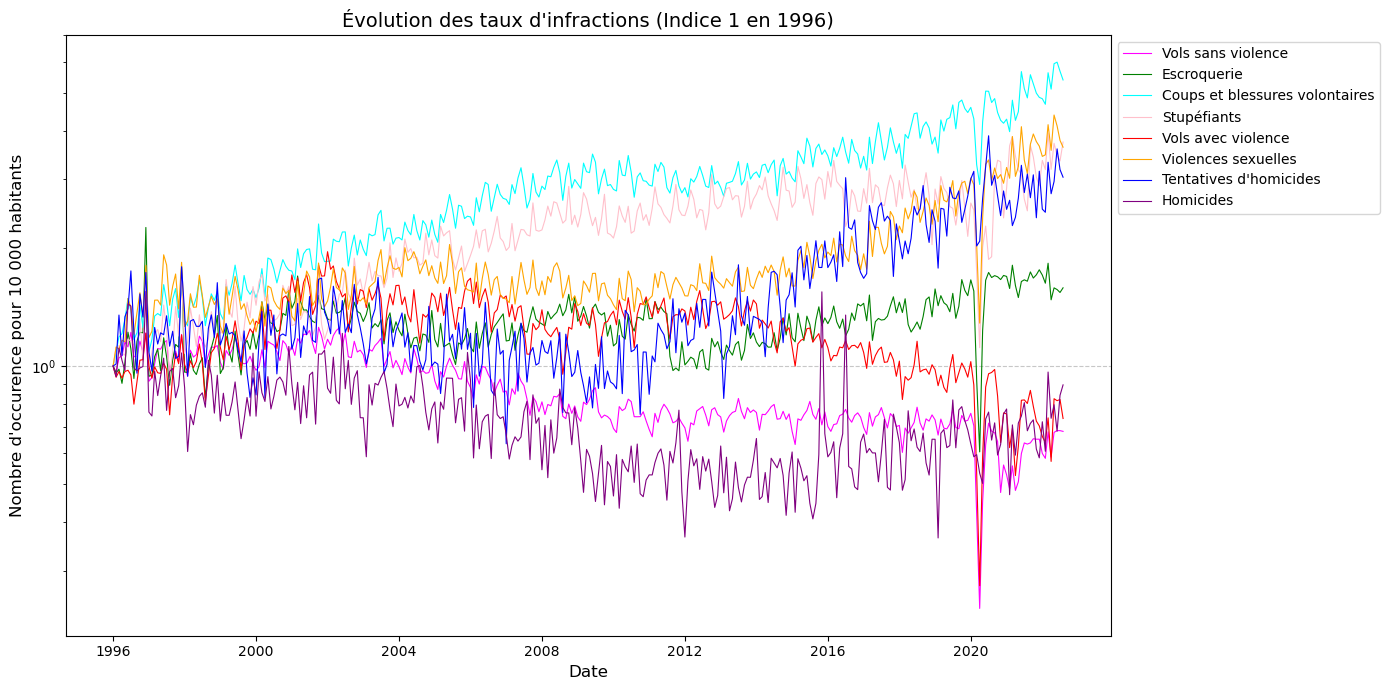

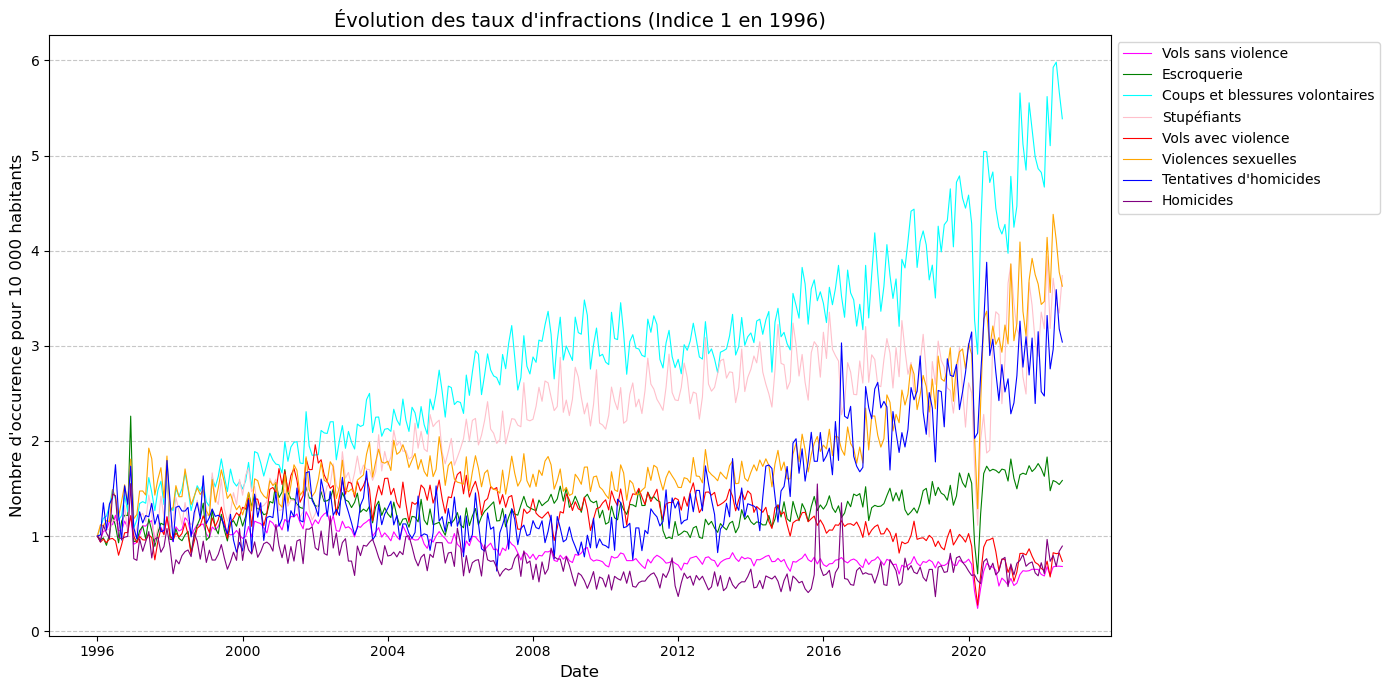

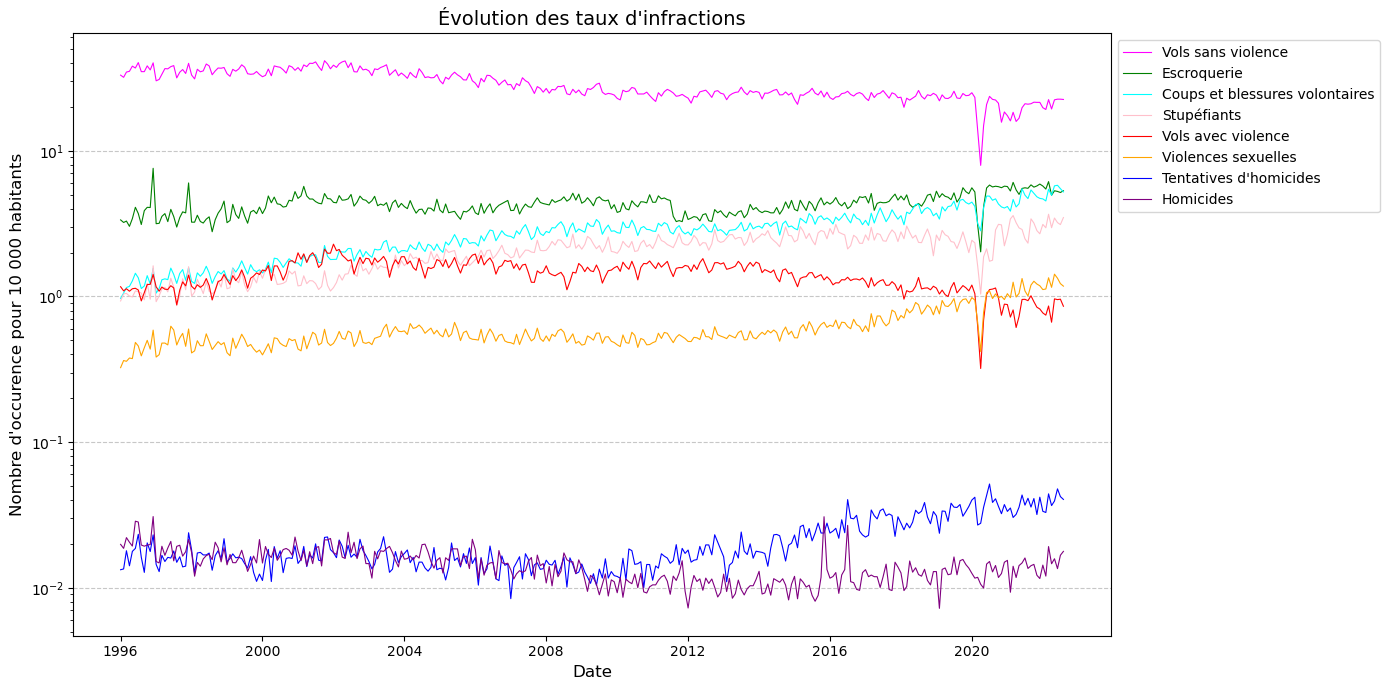

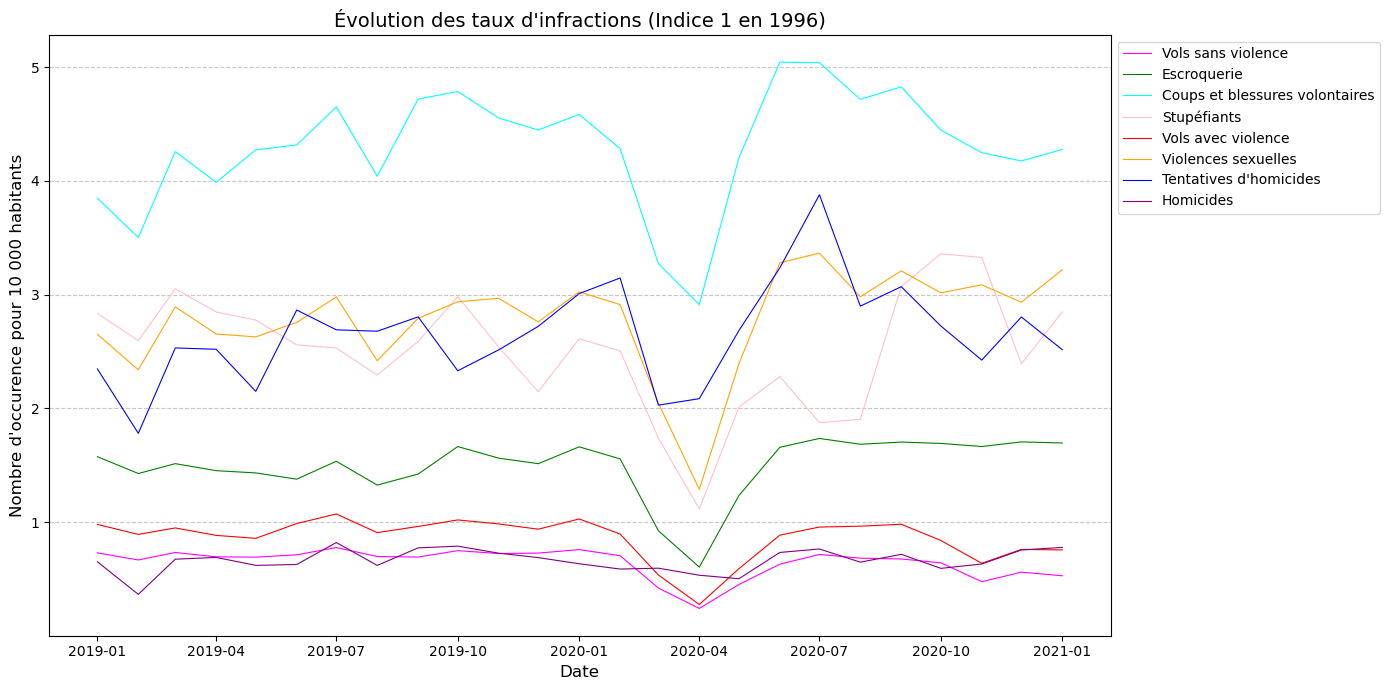

In [7]:
# Exemples d'utilisation
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Évolution des taux d'infractions (Indice 1 en 1996)", use_log_scale = True, time_period=[])
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Évolution des taux d'infractions (Indice 1 en 1996)")
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux (/10 000)", use_log_scale = True)
tracer_evolution_taux(df_indicateurs_nat, charte_graphique, taux = "Taux relatif", title="Évolution des taux d'infractions (Indice 1 en 1996)", use_log_scale = False, smooth = False, time_period=["2019-01-01", "2021-01-01"])

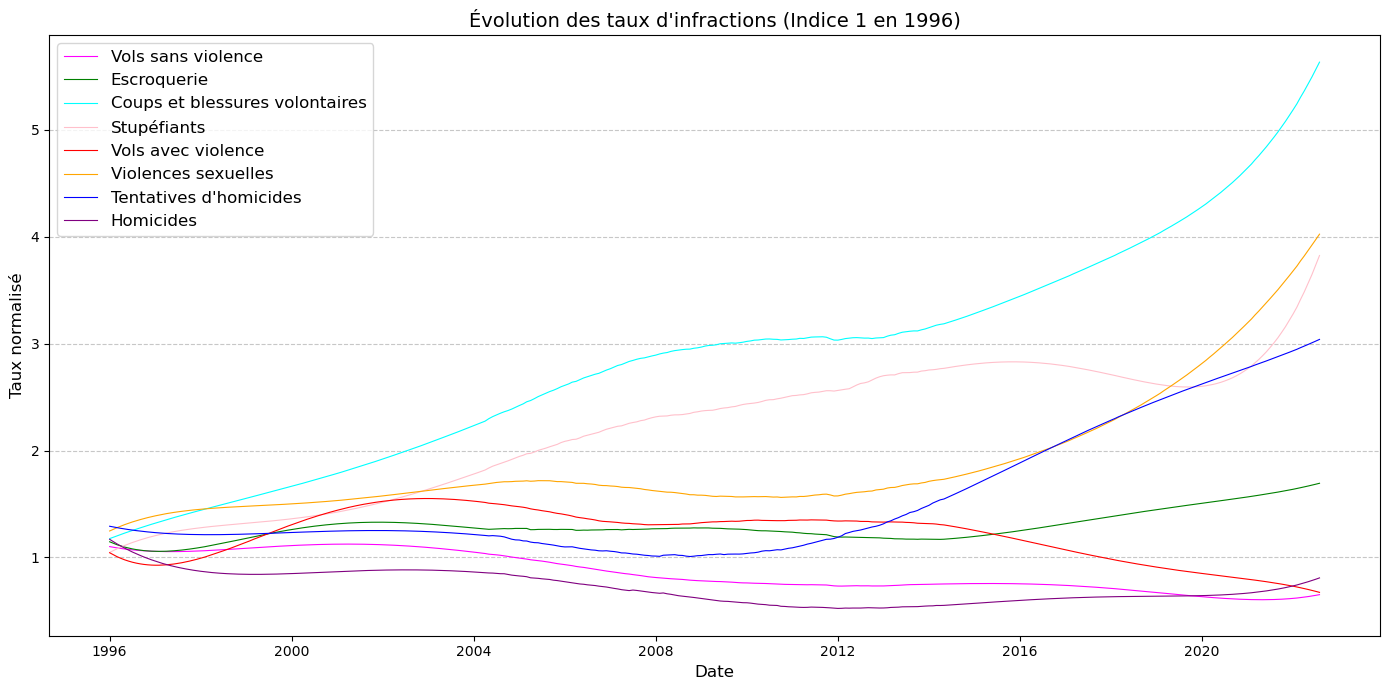

In [8]:
tracer_evolution_taux_relatif_lisse(df_indicateurs_nat, charte_graphique)

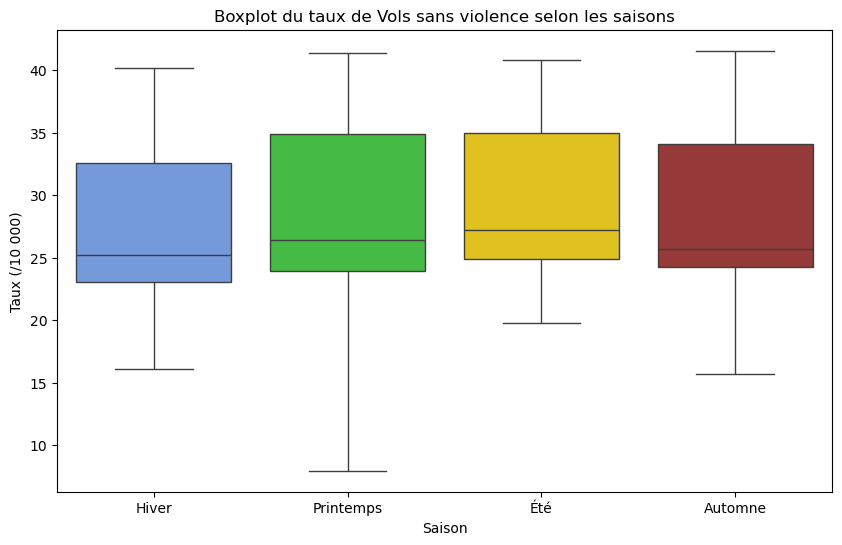

In [9]:
boxplot_indicateur_par_saison(df_indicateurs_nat, "Vols sans violence")

In [10]:
from visualisation import évolution_indicateur
from visualisation import charte_graphique2
from visualisation import dictionnaire_geo

In [11]:
dictionnaire_geo

{'01': <POLYGON ((4.78 46.177, 4.78 46.189, 4.783 46.192, 4.787 46.196, 4.793 46.20...>,
 '02': <POLYGON ((3.173 50.011, 3.174 50.012, 3.179 50.013, 3.18 50.012, 3.183 50.0...>,
 '03': <POLYGON ((3.032 46.795, 3.034 46.791, 3.036 46.789, 3.037 46.784, 3.037 46....>,
 '04': <POLYGON ((5.676 44.191, 5.678 44.191, 5.682 44.19, 5.684 44.19, 5.686 44.18...>,
 '05': <POLYGON ((6.261 45.127, 6.264 45.126, 6.267 45.125, 6.268 45.122, 6.269 45....>,
 '06': <MULTIPOLYGON (((7.067 43.514, 7.067 43.515, 7.061 43.516, 7.06 43.515, 7.05...>,
 '2A': <MULTIPOLYGON (((8.586 41.874, 8.587 41.876, 8.591 41.878, 8.592 41.878, 8.5...>,
 '2B': <MULTIPOLYGON (((9.409 43.022, 9.407 43.023, 9.406 43.024, 9.404 43.026, 9.4...>,
 '07': <POLYGON ((4.483 45.236, 4.488 45.232, 4.491 45.232, 4.499 45.234, 4.504 45....>,
 '08': <POLYGON ((4.233 49.958, 4.237 49.959, 4.24 49.959, 4.241 49.961, 4.245 49.9...>,
 '09': <POLYGON ((1.688 43.274, 1.691 43.272, 1.692 43.27, 1.695 43.268, 1.697 43.2...>,
 '10': <POLYGON ((3.4

In [12]:
from visualisation import évolution_indicateur

/home/onyxia/work/Python-pour-la-data-science-2A/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre.loc[:, "geometry"] = df_filtre["Département"].map(dictionnaire_geo)
/home/onyxia/work/Python-pour-la-data-science-2A/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre.loc[:, "geometry"] = df_filtre["Département"].map(dictionnaire_geo)
/home/onyxia/work/Python-pour-la-data-science-2A/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be se

/home/onyxia/work/Python-pour-la-data-science-2A/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre.loc[:, "geometry"] = df_filtre["Département"].map(dictionnaire_geo)
/home/onyxia/work/Python-pour-la-data-science-2A/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtre.loc[:, "geometry"] = df_filtre["Département"].map(dictionnaire_geo)
/home/onyxia/work/Python-pour-la-data-science-2A/visualisation.py:257: SettingWithCopyWarning: 
A value is trying to be se

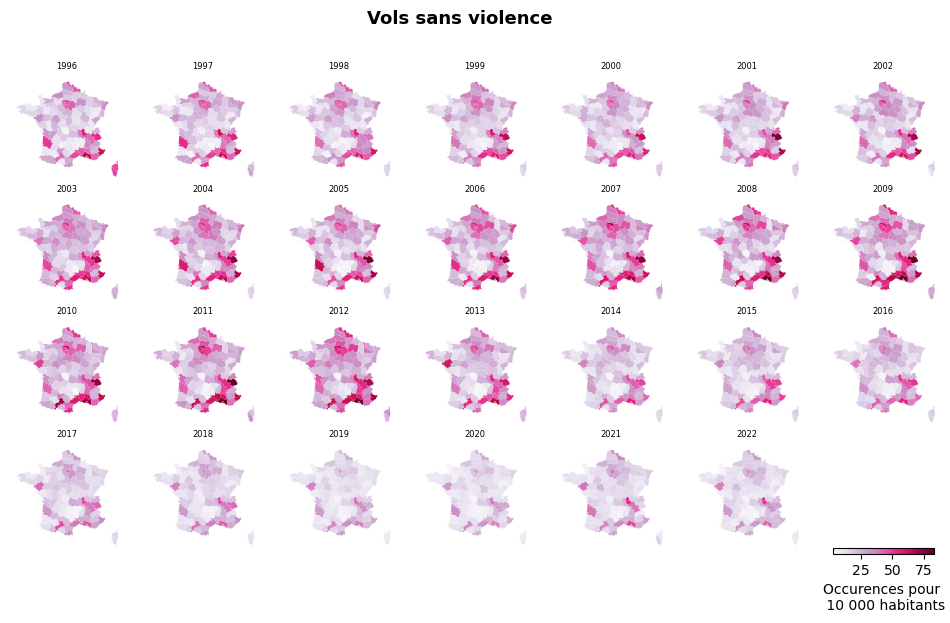

In [13]:
évolution_indicateur(df_indicateurs_dep, "Vols sans violence")

In [14]:
from visualisation import evolution_indicateur_animation

In [15]:
print(df_indicateurs_dep['Année'].dtype)  # Vérifier le type de données de la colonne Année
print(df_indicateurs_dep['Indicateur'].dtype)  # Vérifier le type de données de la colonne Indicateur


int64
object


        # Vérification des lignes sans géométrie
        if df_filtre['geometry'].isna().any():
            print(f"Année {annee} : Certaines géométries sont manquantes pour {indicateur}")
            print(df_filtre)

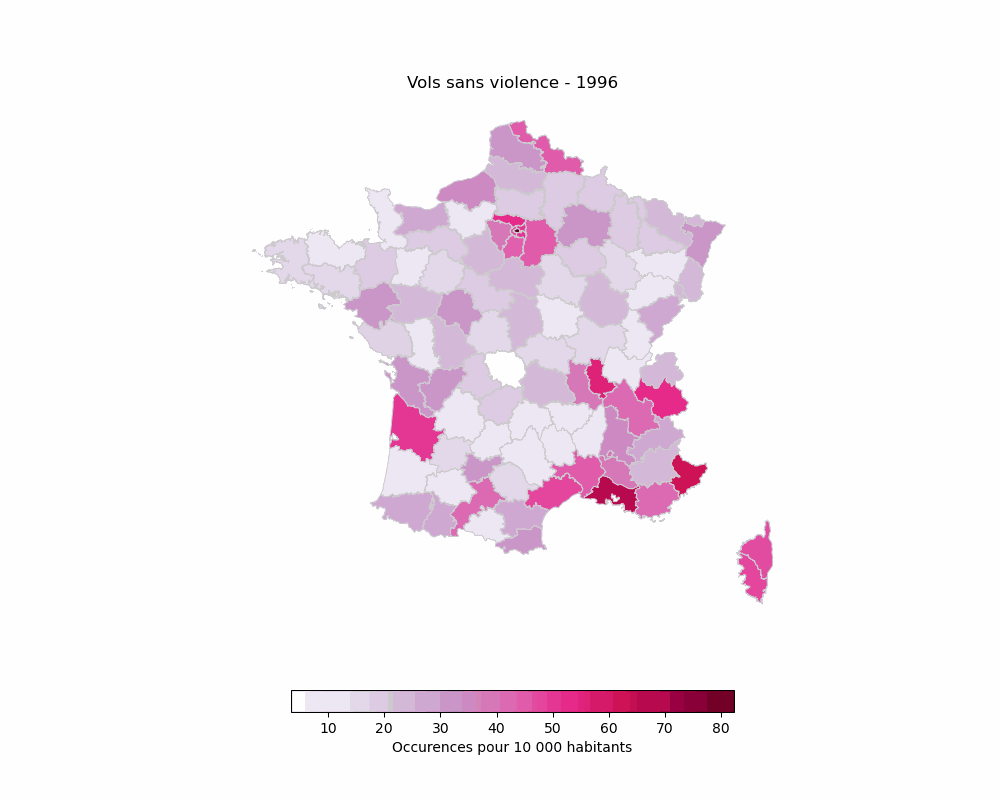

Animation sauvegardée dans animations/evolution_Vols_sans_violence.gif


In [16]:
evolution_indicateur_animation(df_indicateurs_dep, "Vols sans violence", dictionnaire_geo)

In [17]:
from matplotlib.colors import LinearSegmentedColormap

# Définir une colormap personnalisée
def create_custom_greys_cmap():
    # Points de contrôle pour la colormap (0: blanc, 1: noir, ajustés pour nuances intermédiaires)
    colors = [
        (0.95, 0.95, 0.95),  # Très clair
        (0.8, 0.8, 0.8),    # Clair
        (0.6, 0.6, 0.6),    # Intermédiaire
        (0.4, 0.4, 0.4),    # Assez foncé
        (0.2, 0.2, 0.2)     # Foncé mais pas noir
    ]
    return LinearSegmentedColormap.from_list("CustomGreys", colors)

# Créer la colormap
custom_greys_cmap = create_custom_greys_cmap()

In [18]:
def animer_evolution_densite(df, colonne_densite, dictionnaire_geometrie):
    import os
    from IPython.display import display, Image
    from matplotlib import animation, colors
    import geopandas as gpd

    plt.ioff()
    
    # Préparer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8))
    
    # Créer une liste des années disponibles dans le DataFrame
    annees = sorted(df['Année'].unique())
    
    # Fonction d'initialisation pour l'animation
    def init():
        ax.clear()
        ax.set_title("Initialisation")
        ax.axis("off")
        return []
    
    # Fonction de mise à jour pour chaque frame de l'animation
    def update(frame):
        ax.clear()
        annee = annees[frame]
        
        # Filtrer les données pour l'année en cours
        df_filtre = df[df['Année'] == annee].copy()
        
        # Ajouter les géométries depuis le dictionnaire
        df_filtre['geometry'] = df_filtre['Département'].map(dictionnaire_geometrie)
        
        # Créer un GeoDataFrame à partir du DataFrame filtré
        gdf = gpd.GeoDataFrame(df_filtre, geometry='geometry')
        
        # Vérifier si le GeoDataFrame n'est pas vide
        if not gdf.empty:
            # Calculer les limites de couleur
            vmin = df[colonne_densite].min()
            vmax = df[colonne_densite].max()
            
            # Tracer la carte
            gdf.plot(column=colonne_densite, 
                     cmap=custom_greys_cmap,  # Colormap générique
                     ax=ax, 
                     legend=False,
                     vmin=vmin,
                     vmax=vmax,
                     edgecolor='0.8',
                     linewidth=0.5)
            
            # Titre de la carte
            ax.set_title(f"Densité de population - {annee}")
        else:
            print(f"Année {annee} : Aucune donnée disponible")
        
        ax.axis("off")
        ax.set_aspect(1.4)  # Étirement vertical de la carte 
        
        return []
    
    # Créer l'animation
    anim = animation.FuncAnimation(fig, 
                                   update, 
                                   init_func=init,
                                   frames=len(annees), 
                                   interval=500,  # 500 ms entre chaque frame
                                   blit=False)
    
    # Ajouter une barre de couleur
    vmin = df[colonne_densite].min()
    vmax = df[colonne_densite].max()
    sm = plt.cm.ScalarMappable(cmap=custom_greys_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])
    plt.colorbar(sm, ax=ax, orientation='horizontal', fraction=0.036, pad=0.1, label="Densité (hab/km²)")
    
    # Sauvegarder l'animation au format GIF
    os.makedirs('animations', exist_ok=True)  # Crée un dossier 'animations' s'il n'existe pas
    
    # Chemin de sauvegarde
    save_path = f'animations/evolution_densite.gif'
    
    # Sauvegarde en GIF
    anim.save(save_path, writer='pillow', fps=2)

    # Afficher l'animation
    display(Image(filename=save_path))
    
    print(f"Animation sauvegardée dans {save_path}")
    
    return anim

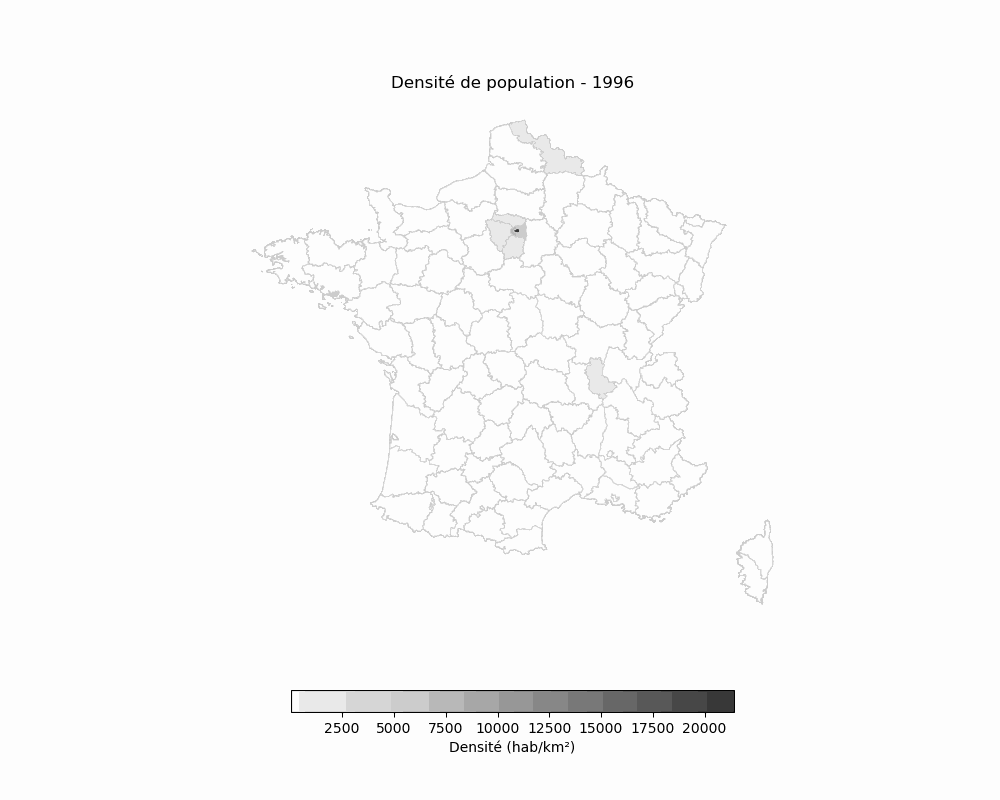

Animation sauvegardée dans animations/evolution_densite.gif


In [19]:
animer_evolution_densite(
    df=df_indicateurs_dep, 
    colonne_densite='Densité', 
    dictionnaire_geometrie=dictionnaire_geo
)

Visualisation pas hyper concluante parce que bon département hors des grandes villes ont des densité assez similaires et assez faibles donc bon ronpiche, on verra comment adapter l'échelle de couleur

In [20]:
def evolution_idf_animation(df, indicateur):
    import os
    from IPython.display import display, Image
    from matplotlib import animation, colors
    import geopandas as gpd
    import matplotlib.pyplot as plt
    
    plt.ioff()
    
    # Filtrer pour l'Île-de-France (codes 75, 77, 78, 91, 92, 93, 94, 95)
    idf_codes = ['75', '77', '78', '91', '92', '93', '94', '95']
    df_idf = df[df['Département'].isin(idf_codes)].copy()
    
    # Ajouter la géométrie à partir du dictionnaire
    df_idf['geometry'] = df_idf['Département'].map(dictionnaire_geo)

    nom_departement = {
        '75': 'Paris', '77': 'Seine-et-Marne', '78': 'Yvelines', '91': 'Essonne', 
        '92': 'Hauts-de-Seine', '93': 'Seine-Saint-Denis', '94': 'Val-de-Marne', '95': 'Val-d\'Oise'
    }
    df_idf['Nom_Departement'] = df_idf['Département'].map(nom_departement)

    gdf_idf = gpd.GeoDataFrame(df_idf, geometry='geometry')
    
    # Créer une liste des années
    annees = sorted(df_idf['Année'].unique())

    # Définir les limites des valeurs de densité pour la colorbar
    vmin = df_idf[indicateur].min()
    vmax = df_idf[indicateur].max()
    
    # Préparer la figure et l'axe
    fig, ax = plt.subplots(figsize=(10, 8), dpi=200)

    # Configurer la colorbar une seule fois
    sm = plt.cm.ScalarMappable(cmap=custom_greys_cmap, norm=colors.Normalize(vmin=vmin, vmax=vmax))
    sm.set_array([])  # Nécessaire pour éviter les erreurs avec colorbar
    cbar = fig.colorbar(sm, ax=ax, orientation='horizontal', label=f"{indicateur}")
    
    # Fonction d'initialisation pour l'animation
    def init():
        ax.clear()
        ax.set_title("Initialisation")
        ax.axis("off")
        return []
    
    # Fonction de mise à jour pour chaque frame de l'animation
    def update(frame):
        ax.clear()
        annee = annees[frame]
        
        # Filtrer les données pour l'année en cours
        gdf_frame = gdf_idf[gdf_idf['Année'] == annee]
        
        # Définir les limites des axes pour centrer sur l'Île-de-France
        bounds = gdf_frame.total_bounds
        ax.set_xlim(bounds[0], bounds[2])
        ax.set_ylim(bounds[1], bounds[3])
        
        # Tracer la carte
        gdf_frame.plot(
            column=indicateur,
            cmap=custom_greys_cmap,  # Utilisez une cmap adaptée
            ax=ax,
            legend=False,
            edgecolor='0.8',
            linewidth=0.7
        )
        
        # Ajouter le titre de l'année
        ax.set_title(f"{indicateur} - {annee}", fontsize=14)
        ax.axis("off")
        ax.set_aspect(1.4)

        # Ajouter les noms des départements
        for _, row in gdf_frame.iterrows():
            # Récupérer le centroïde du département
            centroid = row['geometry'].centroid
            # Ajouter le texte sans boîte blanche, en gris foncé et avec une police plus fine
            ax.text(
                centroid.x, centroid.y, 
                row['Nom_Departement'], 
                ha='center', va='center', 
                fontsize=8, color='#666666', 
                fontweight='light',  
            )
        
        return []
    
    # Créer l'animation
    anim = animation.FuncAnimation(
        fig,
        update,
        init_func=init,
        frames=len(annees),
        interval=500,
        blit=False
    )
    
    # Sauvegarder l'animation au format GIF
    os.makedirs('animations', exist_ok=True)
    save_path = 'animations/evolution_idf_densite.gif'
    anim.save(save_path, writer='pillow', fps=2)
    
    # Afficher l'animation
    display(Image(filename=save_path))
    print(f"Animation sauvegardée dans {save_path}")
    return anim


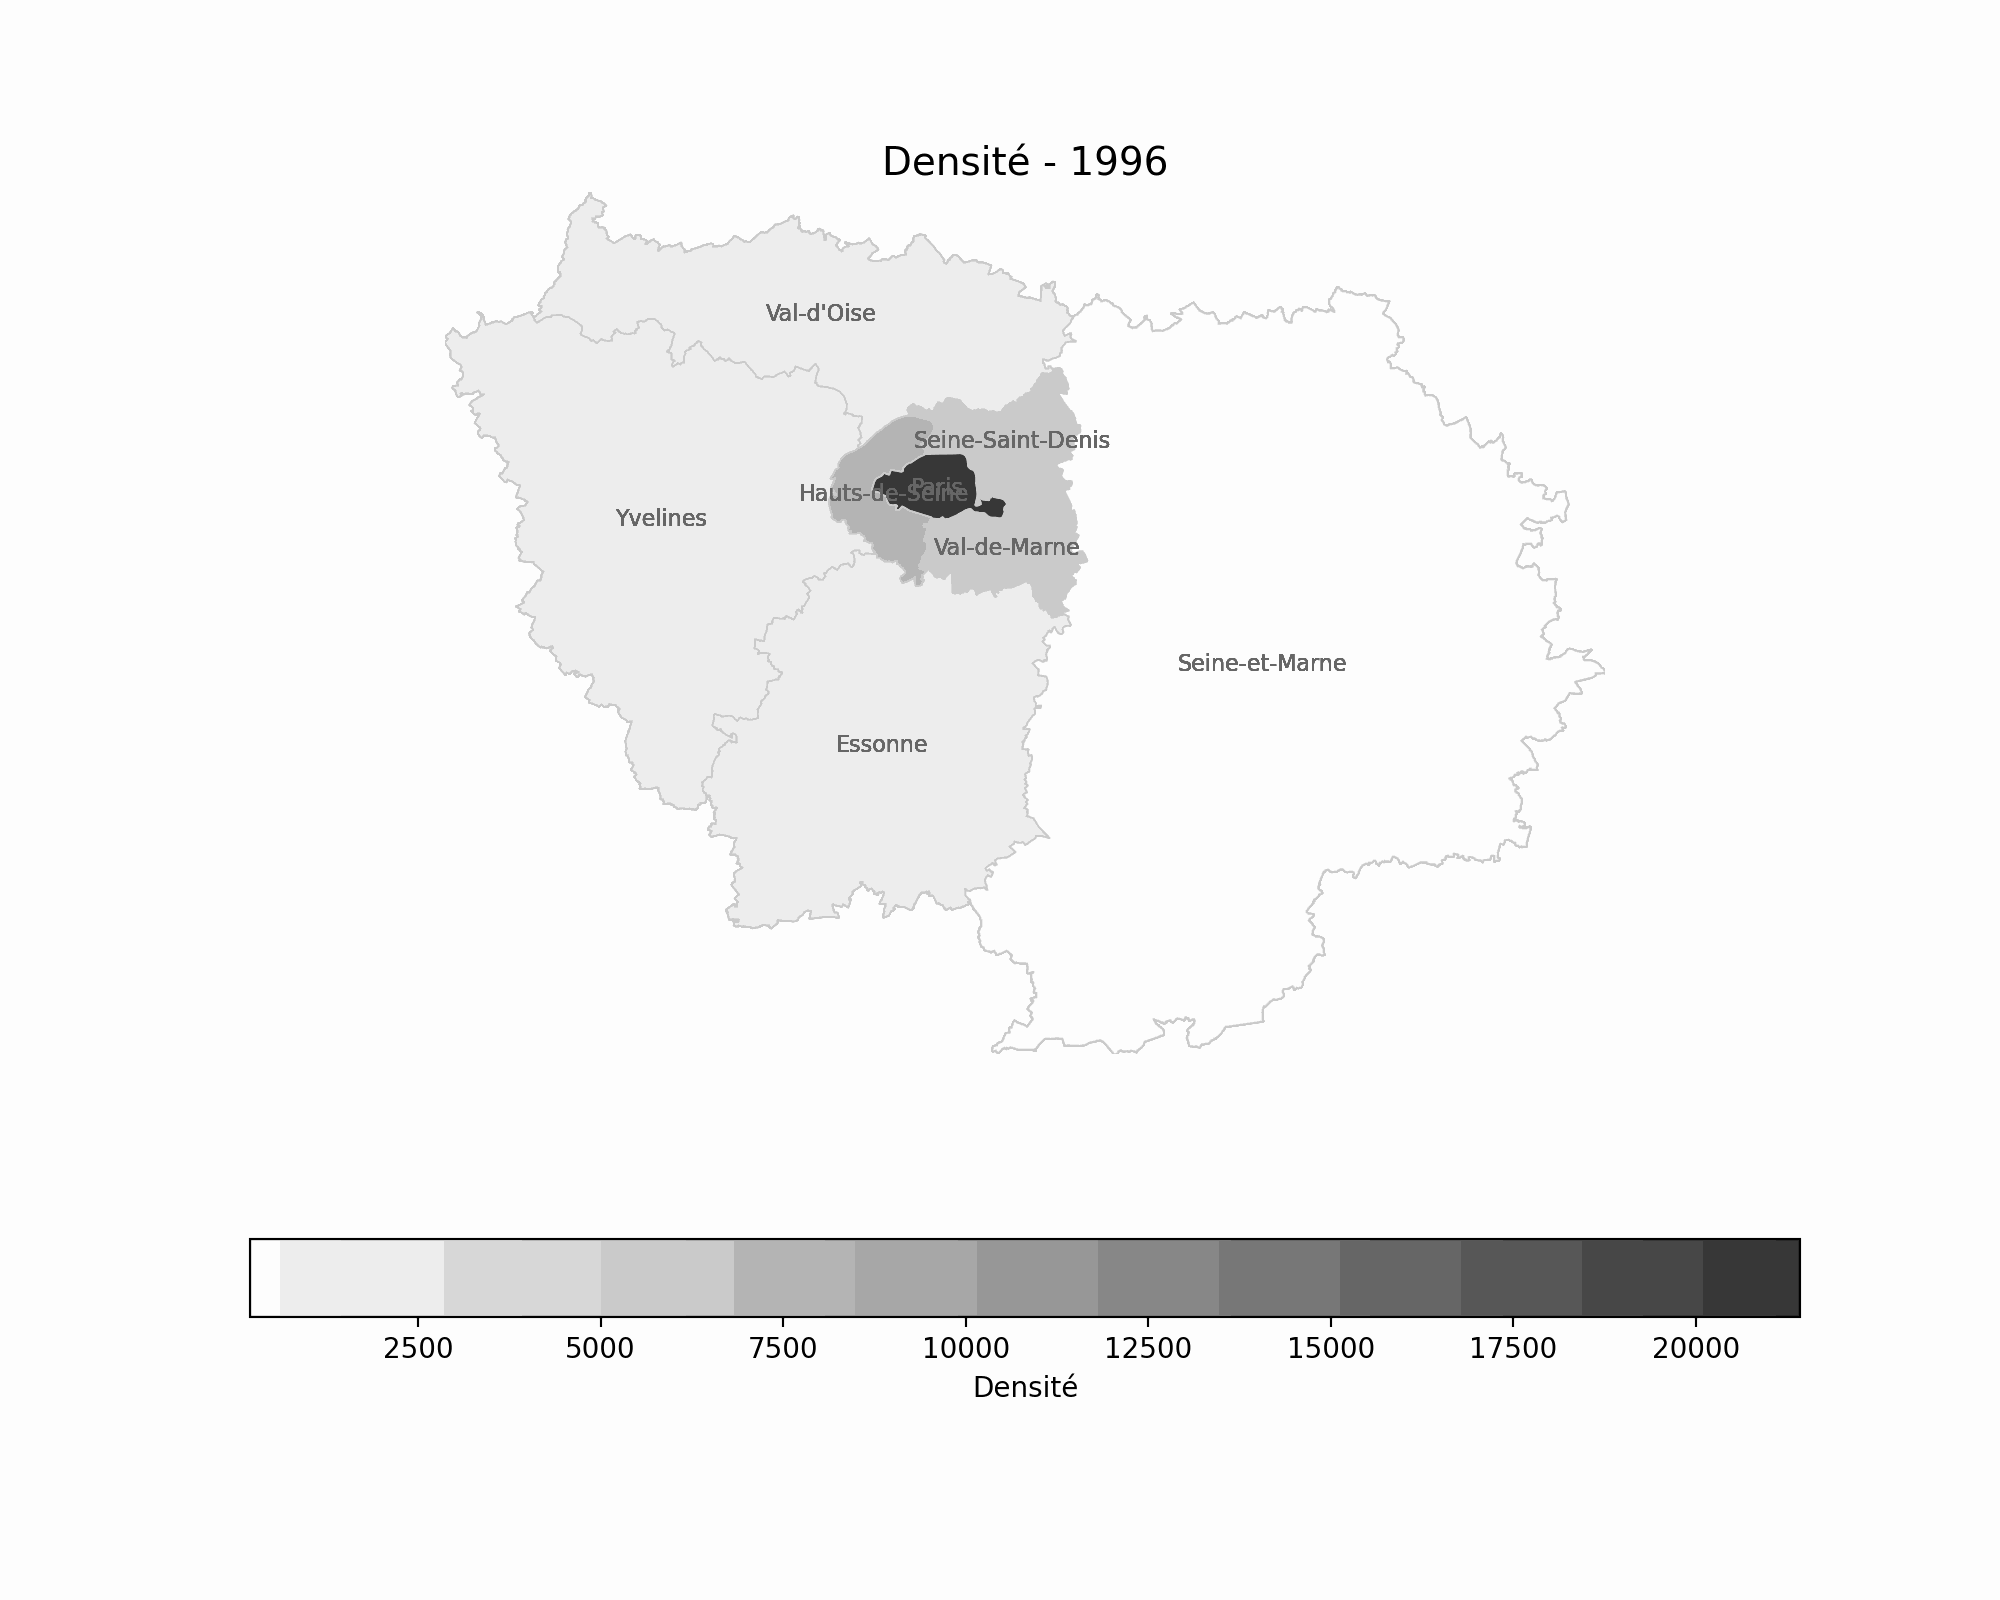

Animation sauvegardée dans animations/evolution_idf_densite.gif


In [21]:
evolution_idf_animation(df_indicateurs_dep, 'Densité')

In [22]:
print("Clés du dictionnaire :", list(dictionnaire_geo.keys()))
print("Départements uniques dans le DataFrame :", df_indicateurs_dep['Département'].unique())


Clés du dictionnaire : ['01', '02', '03', '04', '05', '06', '2A', '2B', '07', '08', '09', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95']
Départements uniques dans le DataFrame : ['01' '02' '03' '04' '05' '06' '07' '08' '09' '10' '11' '12' '13' '14'
 '15' '16' '17' '18' '19' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '2A' '2B' '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41'
 '42' '43' '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55'
 '56' '57' '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69'
 '70

In [23]:
df_indicateurs_dep['Département'].dtype


dtype('O')

In [24]:
types_cles = {type(key) for key in dictionnaire_geo.keys()}
types_valeurs = {type(value) for value in dictionnaire_geo.values()}

print(f"Types des clés : {types_cles}")
print(f"Types des valeurs : {types_valeurs}")

Types des clés : {<class 'str'>}
Types des valeurs : {<class 'shapely.geometry.multipolygon.MultiPolygon'>, <class 'shapely.geometry.polygon.Polygon'>}


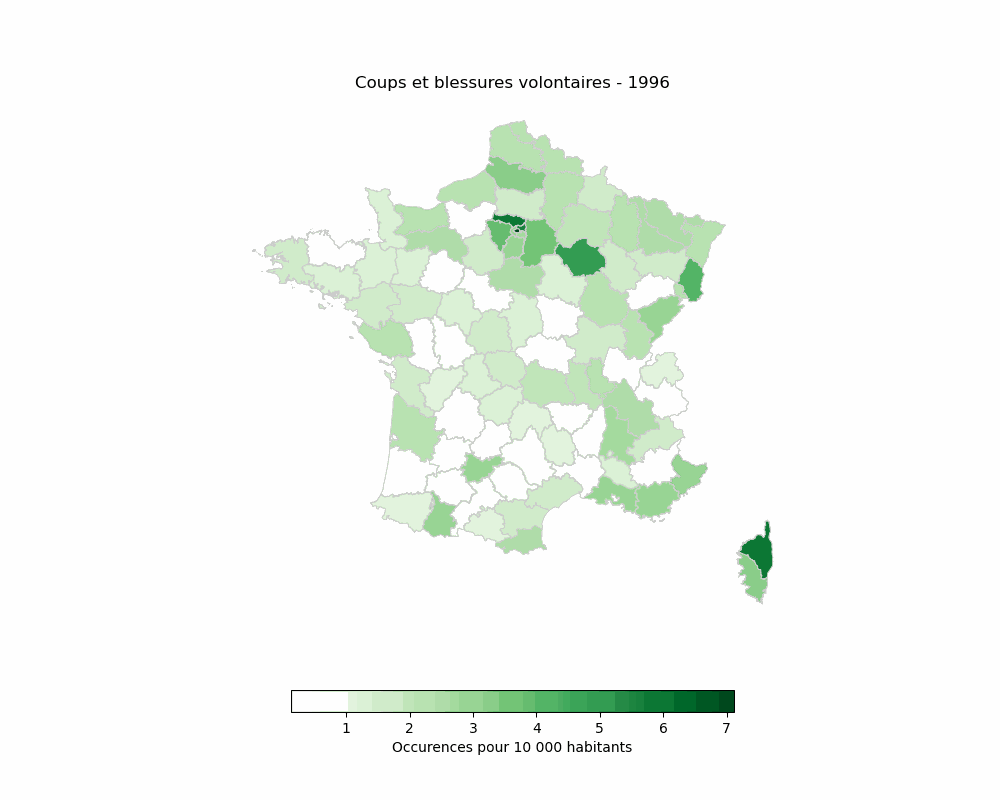

Animation sauvegardée dans animations/evolution_Coups_et_blessures_volontaires.gif


In [25]:
evolution_indicateur_animation(df_indicateurs_dep, "Coups et blessures volontaires", dictionnaire_geo)

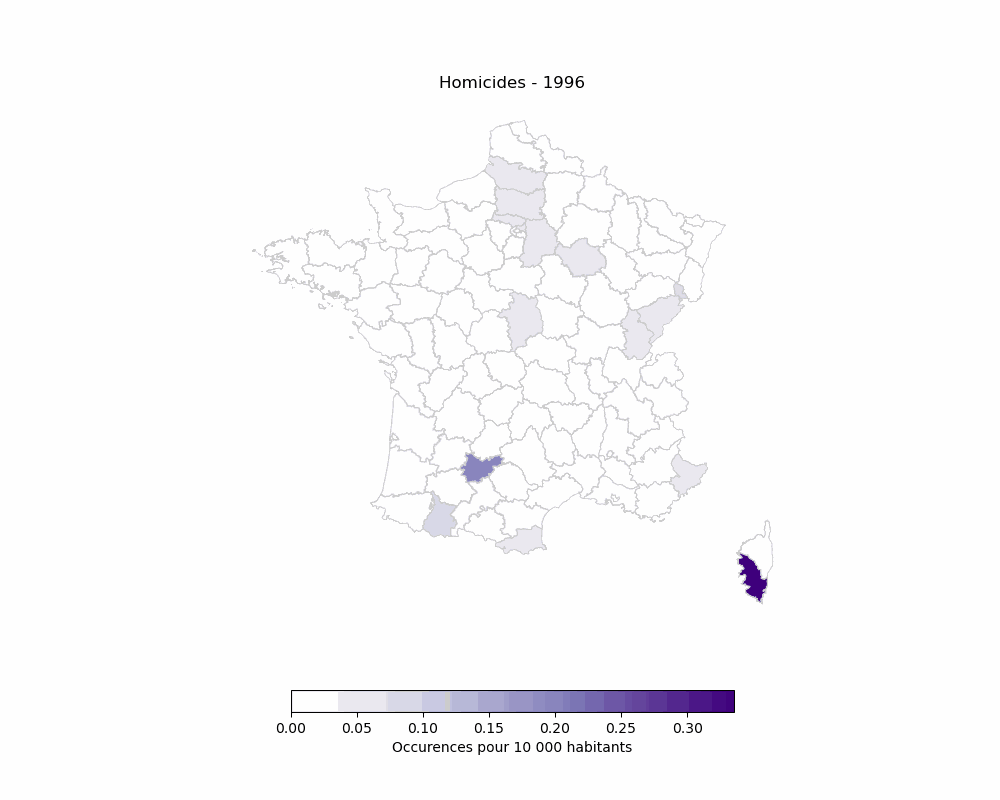

Animation sauvegardée dans animations/evolution_Homicides.gif


In [26]:
evolution_indicateur_animation(df_indicateurs_dep, "Homicides", dictionnaire_geo)

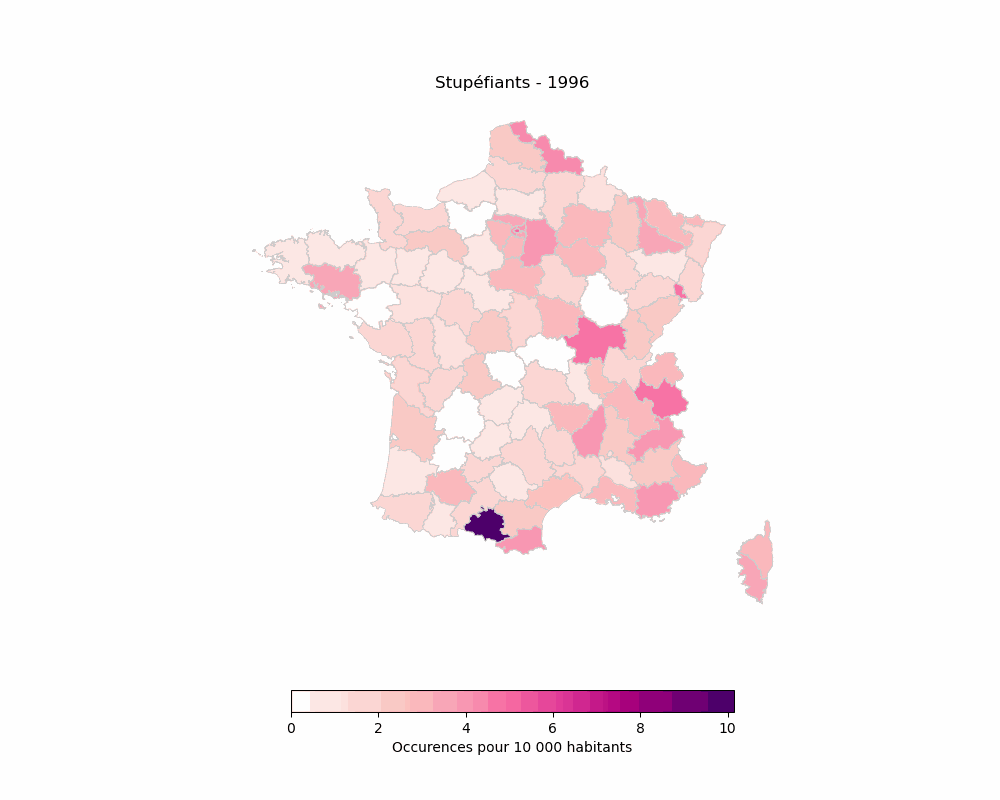

Animation sauvegardée dans animations/evolution_Stupéfiants.gif


In [27]:
evolution_indicateur_animation(df_indicateurs_dep, "Stupéfiants", dictionnaire_geo)